# Worksheet 06

Name:  Snigdha Reddy Pulim
UID: U13354202

### Topics

- Density-Based Clustering

### Density-Based Clustering

Follow along with the live coding of the DBScan algorithm.

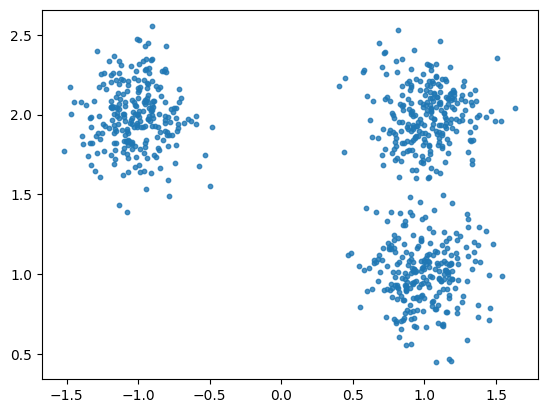

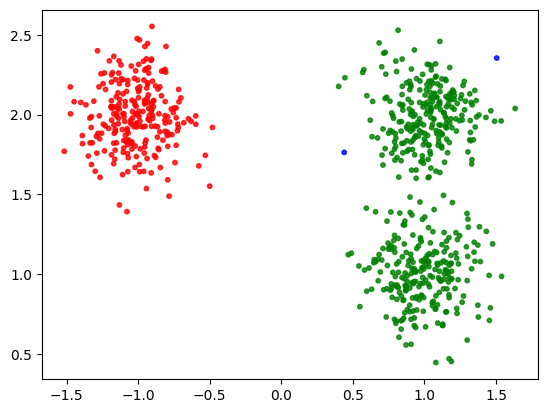

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from PIL import Image as im

TEMPFILE = 'temp.png'

centers = [[1, 1], [-1, 2], [1, 2]]
X, _ = datasets.make_blobs(n_samples=750, centers=centers, cluster_std=0.2,
                            random_state=0)
                            
plt.scatter(X[:,0],X[:,1],s=10, alpha=0.8)
plt.show()

class DBC():

    def __init__(self, dataset, min_pts, epsilon):
        # TODO; make a dictionary of all the neighborhoors upfront
        self.dataset = dataset
        self.min_pts = min_pts
        self.epsilon = epsilon
        self.assignments=[0 for _ in range(len(self.dataset))]
        self.snaps = []

    # TODO; the point itself should be counted

    # TODO can make assignments a class variable

    def dbscan(self):
        """
        returns a list of assignments. The index of the
        assignment should match the index of the data point
        in the dataset.
        """
        cluser_num=1
        for  i in range(len(self.dataset)):
            if self.assignments[i]!=0:
                #already assigned to a cluster - no need to re-evaluate
                continue
            if self.is_core(i):
                self.dfs_assign(i,cluser_num)
                
            cluser_num+=1
        self.snaps[0].save('dbscan.gif',optimize=False,save_all=True,append_images=self.snaps[1:],loop=0,duration=25)
        return self.assignments

    def is_core(self, i):
        neighbors = []
        for j in range(len(self.dataset)):
            if i != j and np.linalg.norm(self.dataset[i] - self.dataset[j]) <= self.epsilon:
                neighbors.append(j)
        return len(neighbors) >= self.min_pts


    def dfs_assign(self, i:int,cluster_num:int):
        self.assignments[i]=cluster_num
        neighbors=self.get_unlabeled_neighborhood(i) 
        while neighbors: # while list will go on till the list is empty
            next_candidate=neighbors.pop()

            #to avoid repeated neighor index
            if self.assignments[next_candidate]!=0:
                #somthing is wrong
                continue

            self.assignments[next_candidate]=cluster_num
            self.snapshot()
            if self.is_core(next_candidate):
                neighbors+=self.get_unlabeled_neighborhood(next_candidate)
        return

    def snapshot(self):
        fig, ax = plt.subplots()
        ax.scatter(self.dataset[:, 0], self.dataset[:, 1],color=colors[self.assignments].tolist(), s=10, alpha=0.8)
        fig.savefig(TEMPFILE)
        plt.close()
        self.snaps.append(im.fromarray(np.asarray(im.open(TEMPFILE))))

    def get_unlabeled_neighborhood(self,i):
        neighbors = []
        for j in range(len(self.dataset)):
            if i != j and self.assignments[j] == 0 and np.linalg.norm(
                    self.dataset[i] - self.dataset[j]) <= self.epsilon:
                neighbors.append(j)

        return neighbors

clustering = DBC(X, 3, .2).dbscan()
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 30)
plt.scatter(X[:, 0], X[:, 1],color=colors[clustering].tolist(), s=10, alpha=0.8)
plt.show()
